# Chapter2. Statistical Learning

### 2.1.1 Why Estimate f?


#### Perdiction

In many situations, a set of inputs X are readily available, but the output Y cannot be easily obtained. In this setting, since the error term averages to zero, we can predict Y using

(Page 17). 

$$\hat{Y} = \hat{f}(X)$$

> where $\hat{f}$ represents our estimate for f, and $\hat{Y}$ represents the resulting prediction for Y . In this setting, $\hat{f}$ is often treated as a black box, in the sense that one is not typically concerned with the exact form of $\hat{f}$, provided that it yields accurate predictions for Y .


### 2.1.3 The Trade-Off Between Prediction Accuracy and Model Interpretability



Of the many methods that we examine in this book, some are less flexible, or more restrictive, in the sense that they can produce just a relatively small range of shapes to estimate f. For example, linear regression is a relatively inflexible approach, because it can only generate linear functions such as the lines shown in Figure 2.1 or the plane shown in Figure 2.4.


Other methods, such as the thin plate splines shown in Figures 2.5 and 2.6, are considerably more flexible because they can generate a much wider range of possible shapes to estimate f. 

One might reasonably ask the following question: why would we ever choose to use a more restrictive method instead of a very flexible approach? There are several reasons that we might prefer a more restrictive model. If we are mainly interested in inference, then restrictive models are much more interpretable. For instance, when inference is the goal, the linear model may be a good choice since it will be quite easy to understand the relationship between Y and X1, X2,...,Xp. In contrast, very flexible approaches, such as the splines discussed in Chapter 7 and displayed in Figures 2.5 and 2.6, and the boosting methods discussed in Chapter 8, can lead to such complicated estimates of f that it is difficult to understand how any individual predictor is associated with the response.

 Figure 2.7 provides an illustration of the trade-off between flexibility and interpretability for some of the methods that we cover in this book. Least squares linear regression, discussed in Chapter 3, is relatively inflexible but is quite interpretable. The lasso, discussed in Chapter 6, relies upon the linear model (2.4) but uses an alternative fitting procedure for estimating the coefficients β0, β1,...,βp. The new procedure is more restrictive in estimating the coefficients, and sets a number of them to exactly zero. Hence in this sense the lasso is a less flexible approach than linear regression. It is also more interpretable than linear regression, because in the final model the response variable will only be related to a small subset of the predictors—namely, those with nonzero coefficient estimates. Generalized additive models (GAMs), discussed in Chapter 7, instead extend the linear model (2.4) to allow for certain non-linear relationships. Consequently, GAMs are more flexible than linear regression. They are also somewhat less interpretable than linear regression, because the relationship between each predictor and the response is now modeled using a curve. Finally, fully non-linear methods such as bagging, boosting, and support vector machines with non-linear kernels, discussed in Chapters 8 and 9, are highly flexible approaches that are harder to interpret.

We have established that when inference is the goal, there are clear advantages to using simple and relatively inflexible statistical learning methods. In some settings, however, we are only interested in prediction, and the interpretability of the predictive model is simply not of interest. For instance, if we seek to develop an algorithm to predict the price of a stock, our sole requirement for the algorithm is that it predict accurately— interpretability is not a concern. In this setting, we might expect that it will be best to use the most flexible model available. ***Surprisingly, this is not always the case! We will often obtain more accurate predictions using a less flexible method***. This phenomenon, which may seem counterintuitive at first glance, has to do with the potential for overfitting in highly flexible methods. We saw an example of overfitting in Figure 2.6. We will discuss this very important concept further in Section 2.2 and throughout this book.


![F2-7](image/F2.7.png)

### 2.1.4 Supervised Versus Unsupervised Learning


Most statistical learning problems fall into one of two categories: supervised or unsupervised. The examples that we have discussed so far in this chapter all fall into the supervised learning domain. For each observation of the predictor measurement(s) xi, i = 1,...,n there is an associated response measurement yi. We wish to fit a model that relates the response to the predictors, with the aim of accurately predicting the response for future observations (prediction) or better understanding the relationship between the response and the predictors (inference). Many classical statistical learning methods such as linear regression and logistic regression (Chapter 4), as well as more modern approaches such as GAM, boosting, and support vector machines, operate in the supervised learning domain. The vast majority of this book is devoted to this setting. In contrast, unsupervised learning describes the somewhat more challenging situation in which for every observation i = 1,...,n, we observe a vector of measurements xi but no associated response yi. It is not possible to fit a linear regression model, since there is no response variable to predict. In this setting, we are in some sense working blind; the situation is referred to as unsupervised because we lack a response variable that can supervise our analysis. What sort of statistical analysis is possible? We can seek to understand the relationships between the variables or between the observations. One statistical learning tool that we may use in this setting is cluster analysis, or clustering. The goal of cluster analysis is to ascertain, on the basis of x1,...,xn, whether the observations fall into relatively distinct groups. For example, in a market segmentation study we might observe multiple characteristics (variables) for potential customers, such as zip code, family income, and shopping habits. We might believe that the customers fall into different groups, such as big spenders versus low spenders. If the information about each customer’s spending patterns were available, then a supervised analysis would be possible. However, this information is not available—that is, we do not know whether each potential customer is a big spender or not. In this setting, we can try to cluster the customers on the basis of the variables measured, in order to identify distinct groups of potential customers. Identifying such groups can be of interest because it might be that the groups differ with respect to some property of interest, such as spending habits.

Figure 2.8 provides a simple illustration of the clustering problem. We have plotted 150 observations with measurements on two variables, X1 and X2. Each observation corresponds to one of three distinct groups. For illustrative purposes, we have plotted the members of each group using different colors and symbols. However, in practice the group memberships are unknown, and the goal is to determine the group to which each observation belongs. In the left-hand panel of Figure 2.8, this is a relatively easy task because the groups are well-separated. In contrast, the right-hand panel illustrates a more challenging problem in which there is some overlap between the groups. A clustering method could not be expected to assign all of the overlapping points to their correct group (blue, green, or orange). In the examples shown in Figure 2.8, there are only two variables, and so one can simply visually inspect the scatterplots of the observations in order to identify clusters. However, in practice, we often encounter data sets that contain many more than two variables. In this case, we cannot easily plot the observations. For instance, if there are p variables in our data set, then p(p − 1)/2 distinct scatterplots can be made, and visual inspection is simply not a viable way to identify clusters. For this reason, automated clustering methods are important. We discuss clustering and other unsupervised learning approaches in Chapter 10.

### 2.2.2 The Bias-Variance Trade-Off

$$E(y_0-\hat{f}(x_0))^2 = Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\epsilon)$$

this is so because
![MSE-Bias_Var](image/mse_bias_var.jpg)

Here the notation $E(y_0-\hat{f}(x_0))^2$ defines the *expected test MSE*, and refers expected to the average test MSE that we would obtain if we repeatedly estimated test MSE $f$ using a large number of training sets, and tested each at $x_0$. The overall expected test MSE can be computed by averaging $E(y_0-\hat{f}(x_0))^2$  over all possible values of $x_0$ in the test set.

Equation 2.7 tells us that in order to minimize the expected test error, we need to select a statistical learning method that simultaneously achieves *low variance and low bias*. Note that variance is inherently a nonnegative quantity, and squared bias is also nonnegative. Hence, we see that the expected test MSE can never lie below $Var(\epsilon)$, the irreducible error from (2.3).

***As a general rule, as we use more flexible methods, the variance will increase and the bias will decrease.*** The relative rate of change of these two quantities determines whether the test MSE increases or decreases. As we increase the flexibility of a class of methods, the bias tends to initially decrease faster than the variance increases. Consequently, the expected test MSE declines. However, ***at some point increasing flexibility has little impact on the bias but starts to significantly increase the variance***. When this happens the test MSE increases. Note that we observed this pattern of decreasing test MSE followed by increasing test MSE in the right-hand panels of Figures 2.9–2.11.

(Page 35). 

### 2.3.1 Basic Commands

In [18]:
import numpy as np  # for calculation purpose, let use np.array 
import random # for the random 
import pandas as pd

x = np.array([1, 3, 2, 5])
print (x)

[1 3 2 5]


In [7]:
x = np.array([1, 6, 2])
print (x)
y = [1, 4, 3]

[1 6 2]


### use len() to find length of a vector

In [8]:
len(x)  

3

In [9]:
len(y)

3

In [10]:
print(x + y) # please note that we define x and y a little bit differently, but we still can do the calculation 
y = np.array([1, 4, 3])

[ 2 10  5]


In [11]:
whos

Variable   Type       Data/Info
-------------------------------
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
random     module     <module 'random' from 'C:<...>aconda3\\lib\\random.py'>
x          ndarray    3: 3 elems, type `int32`, 12 bytes
y          ndarray    3: 3 elems, type `int32`, 12 bytes


In [12]:
del x # reset_selective x

In [13]:
%whos

Variable   Type       Data/Info
-------------------------------
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
random     module     <module 'random' from 'C:<...>aconda3\\lib\\random.py'>
y          ndarray    3: 3 elems, type `int32`, 12 bytes


In [14]:
reset?

In [25]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [26]:
x = np.array([1, 2, 3, 4])

In [27]:
x = np.reshape(x, [2,2])
x

array([[1, 2],
       [3, 4]])

In [28]:
np.sqrt(x)

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

In [31]:
x**2

array([[ 1,  4],
       [ 9, 16]], dtype=int32)

In [30]:
np.square(x)

array([[ 1,  4],
       [ 9, 16]], dtype=int32)

In [47]:
mu, sigma = 0, 1

x = np.random.normal(mu, sigma, 50)
y = x + np.random.normal(50, sigma, 50)

print(x)
print(y)

[-0.37273889 -0.31392768  0.60018674 -1.44939426  0.81737599 -0.17564215
  0.41458687 -0.52152341  1.64890751  0.16941586 -1.51855294 -3.19715254
 -0.0936825  -1.45342793 -0.15005445  0.85082654 -0.0283666  -0.36877265
  0.02527288 -0.24958506  0.2405758  -0.63734642 -0.03258334  0.53234307
 -0.43240832  1.39344284 -0.448188   -0.8974575  -0.62779315 -1.5983208
  1.00223723 -1.13180757  0.32114339 -0.56065437 -0.42132738  0.96218573
  0.3813848   0.72040531  1.17634325  0.41189096 -2.70264785  1.67532029
 -1.1393203   0.59868604 -0.15033665 -0.36810254 -0.17837243 -0.33706603
  1.52017286  0.35245515]
[48.48894731 50.49212604 51.44621019 47.45563197 50.01409757 49.05270474
 52.69266314 48.00045812 51.91794775 51.60529865 49.44665452 46.56298278
 50.26282943 49.38720502 50.24388517 49.50818271 49.76965835 51.66529035
 51.04849926 48.30421982 50.88764036 49.89141625 49.98606805 49.78102873
 49.04446822 51.67003919 50.43892171 50.62719507 51.34040195 49.54813721
 51.45452553 48.39847925 5

In [50]:
np.corrcoef(x, y) 

array([[1.        , 0.75102933],
       [0.75102933, 1.        ]])

### Above will return the correlation matrix 

In [51]:
np.corrcoef(x, y)[0,1]

0.7510293314278879

In [52]:
import random 
random.seed(2333)

In [53]:
np.random.normal(mu, sigma, 50) # after set up the seed, this should genernate the same result

array([ 0.26805047, -0.97696952,  0.75324188, -0.79754104, -1.03370692,
       -0.43105797,  2.21015403,  0.34083008,  0.67207876,  0.31354821,
        0.48913664, -0.68808353, -1.12822515,  0.57540598, -0.59994637,
       -0.22926059, -1.01794561,  0.08263385,  0.68543299, -0.68818549,
        0.05272484,  1.21990029, -0.21139283,  0.37323662,  1.07740133,
        0.4809592 ,  0.2323042 ,  2.1133345 , -1.64219694, -1.61553636,
        0.05245694,  0.44947095, -0.96794059, -1.32073083,  0.76227272,
       -0.56073207, -1.40061956,  1.2982478 ,  0.49720563, -0.8897036 ,
       -1.20957116,  0.39839013, -0.18476478, -0.069391  , -0.05194869,
        0.90067743, -2.13600143,  0.90086111,  0.95838267,  2.4828721 ])

In [54]:
y = np.random.normal(mu, sigma, 100)

In [55]:
np.mean(y)

-0.022703593191853586

In [56]:
np.var(y)

0.8408010268100439

In [57]:
print (np.sqrt(np.var(y)))
print (np.std(y))

0.916952030811887
0.916952030811887


### if we raise the number of sample to a larger number, the mean and std will be more close to (0, 1)

In [58]:
y = np.random.normal(mu, sigma, 5000)
print (np.mean(y))
print (np.std(y))

0.0032510940980953287
0.9995758445605996


## 2.3.2 Graphics

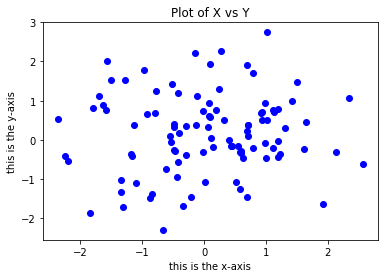

In [60]:
import numpy as np  # for calculation purpose, let use np.array 
import random # for the random 

x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

# In python, matplotlib is the most used library for plot 
# matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
import matplotlib.pyplot as plt


plt.plot(x, y, 'bo') # please use plt.plot? to look at more options 
plt.ylabel("this is the y-axis")
plt.xlabel("this is the x-axis")
plt.title("Plot of X vs Y")
plt.savefig('Figure.pdf') # use plt.savefig function to save images
plt.show() 


In [61]:
x = np.arange(1, 11) # note the arange excludes right end of rande specification 
x


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### note: this actually can result in unexpected results; check np.arange(0.2, 0.6, 0.4) vs np.arange(0.2, 1.6, 1.4);

In [66]:
# in order to use Pi, math module needs to loaded first
import math
x = np.linspace(-math.pi, math.pi, num = 50)
x

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

In [68]:
import matplotlib.cm as cm
import matplotlib.mlab as mlab
y = x
X, Y = np.meshgrid(x,y)

In [70]:
whos

Variable   Type       Data/Info
-------------------------------
X          ndarray    50x50: 2500 elems, type `float64`, 20000 bytes
Y          ndarray    50x50: 2500 elems, type `float64`, 20000 bytes
cm         module     <module 'matplotlib.cm' f<...>ages\\matplotlib\\cm.py'>
math       module     <module 'math' (built-in)>
mlab       module     <module 'matplotlib.mlab'<...>es\\matplotlib\\mlab.py'>
mu         int        0
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module     <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
random     module     <module 'random' from 'C:<...>aconda3\\lib\\random.py'>
sigma      int        1
x          ndarray    50: 50 elems, type `float64`, 400 bytes
y          ndarray    50: 50 elems, type `float64`, 400 bytes


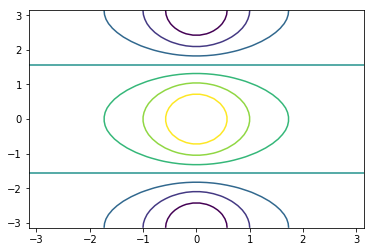

In [80]:
f = np.cos(Y)/(1 + np.square(X))
CS = plt.contour(X, Y, f)
plt.show()


### same as above, use plt.contour? to explore the options

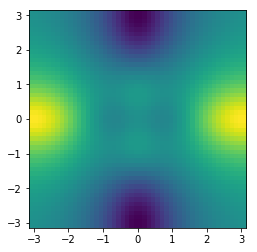

In [85]:
fa = (f-f.T) / 2
plt.imshow(fa, extent=(x[0], x[-1], y[0], y[-1]))
plt.show()

### I think imshow looks nicer for heatmap, use 'extent =' fix the x, y axis

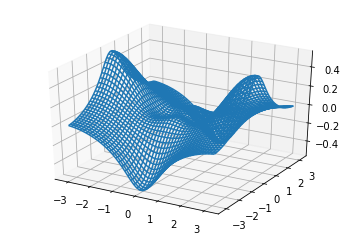

In [86]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, fa)

plt.show()

## 2.3.3 Indexing Data

In [82]:
A = np.arange(1,17,1).reshape(4, 4).transpose()
A

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

In [87]:
A[2, 3]

15

### try the same index as the book, but we got different number. The reason is R starts the index from 1 (Matlab too), but Python starts the index from 0. To select the same number (10) as the book did, we reduce the index by 1

In [88]:
A[1, 2]

10

### to select a submatrix, need the non-singleton dimension of your indexing array to be aligned with the axis you're indexing into, e.g. for an n x m 2D subarray: A[n by 1 array,1 by m array]

In [97]:
A[[0,2], [1,3]]

array([ 5, 15])

In [90]:
A[[[[0], [2]]], [1,3]]

array([[[ 5, 13],
        [ 7, 15]]])

In [98]:
A[0:3:1, 1:4:1] # this is another way of doing it

array([[ 5,  9, 13],
       [ 6, 10, 14],
       [ 7, 11, 15]])

In [99]:
A[0:2,:]

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14]])

In [100]:
A[:,0:2]

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

### The last two examples include either no index for the columns or no index for the rows. These indicate that Python should include all columns or all rows, respectively

In [102]:
A[0,:]

array([ 1,  5,  9, 13])

### '-' sign has a different meaning in Python. This means index from the end, -1 means the last element 

In [103]:
A[-1, -1] 

16

### There are quite a few ways to let Python keep all rows except certain index. Here boolean was used.

In [106]:
ind = np.ones((4,), bool)
ind

array([ True,  True,  True,  True])

In [113]:
ind[[0,2],]

array([ True,  True])

In [115]:
ind[[0,2]] = False
ind

array([False,  True, False,  True])

In [116]:
A[ind,:]

array([[ 2,  6, 10, 14],
       [ 4,  8, 12, 16]])

In [117]:
A[ind]

array([[ 2,  6, 10, 14],
       [ 4,  8, 12, 16]])

In [118]:
A.shape

(4, 4)

## 2.3.4 Loading Data

### In Python, Pandas is a common used module to read from file into a data frame. I downloaded the Auto.csv from the book website. First, take a look at the csv file. There are headers, missing value is marked by '?'  .

In [121]:
import pandas as pd 
pd.options.display.max_rows = 10

In [122]:
Auto = pd.read_csv('data/Auto.csv', header=0, na_values='?')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


### check one record with missing value, and make sure the missing value is correctly imported 

In [136]:
Auto[Auto.notnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [131]:
Auto.iloc[32]

mpg                     25
cylinders                4
displacement            98
horsepower             NaN
weight                2046
acceleration            19
year                    71
origin                   1
name            ford pinto
Name: 32, dtype: object

### Use the same function as in ndarray to find out the dimension of the data frame 

In [144]:
Auto.shape

(397, 9)

In [145]:
Auto[:4]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst


In [151]:
Auto.iloc[[1,3,5,6,7,8,10], [2, 5, 6]]

,displacement,acceleration,year
1,350.0,11.5,70
3,304.0,12.0,70
5,429.0,10.0,70
6,454.0,9.0,70
7,440.0,8.5,70
8,455.0,10.0,70
10,383.0,10.0,70


In [152]:
list(Auto)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

In [153]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

### Use .isnull and .sum to find out how many NaNs in each variables

In [177]:
Auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### after the previous steps, there are 397 obs in the data and only 5 with missing values. We can just drop the ones with missing values  

In [175]:
Auto = Auto.dropna()

In [176]:
Auto.shape

(392, 9)

## 2.3.5 Additional Graphical and Numerical Summaries

### refer a column of data frame by name, by using a '.'. Ref the options in plt.plot for more.

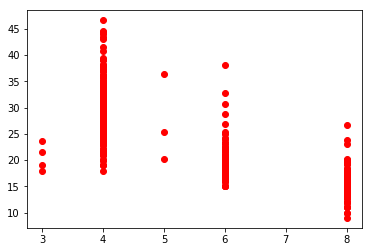

In [178]:
plt.plot(Auto.cylinders, Auto.mpg, 'ro')
plt.show()

### Use .hist to get the histogram of certain variables. column = to specify which variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FF9AC0C88>,
      dtype=object)

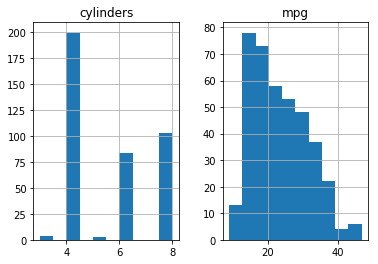

In [181]:
Auto.hist(column=['cylinders', 'mpg'])

### Use the .describe() to get a summary of the data frame. Use .describe ( include = 'all' ) for mix types, use describe(include = [np.number]) for numerical columns, use describe(include = ['O']) for objects.

In [182]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### We can change type of certain variable(s). Here changed the cylinders into categorical variable 

In [183]:
Auto['cylinders'] = Auto['cylinders'].astype('category')

C:\Users\idsoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [184]:
Auto.describe()

,mpg,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [185]:
Auto.describe(include= 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,392.000000,392.0,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,amc matador
freq,NaN,199.0,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.445918,NaN,194.41199,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN
...,...,...,...,...,...,...,...,...,...
min,9.000000,NaN,68.00000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.000000,NaN,105.00000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN
50%,22.750000,NaN,151.00000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,NaN,275.75000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN
